In [1]:
import pandas as pd
import numpy as np
import os
import os.path as osp
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [2]:
os.getcwd()

'D:\\Project- Electro\\social_behavior_electro\\analysis'

In [11]:
path_to_affiliative_files = 'D:\\Project- Electro\\summary - 3-2022\\Brain states of Affiliation and Aversive behaviour\\Affiliative interaction\\audio excel files'
path_to_aversive_files = 'D:\\Project- Electro\summary - 3-2022\Brain states of Affiliation and Aversive behaviour\Aversive Interaction\excel files'
path_to_free_files = 'D:\\Project- Electro\\Summary of free interaction - 1-2023\\audio excel files'

In [13]:
all_aff_files = glob.glob(osp.join(path_to_affiliative_files,'*.xlsx'))
all_avv_files = glob.glob(osp.join(path_to_aversive_files,'*.xlsx'))
all_free_files = glob.glob(osp.join(path_to_free_files,'*.xlsx'))
len(all_free_files)

61

In [15]:
import re

def fix_file_paths(df_files):
    
    df_files = df_files.rename(columns={df_files.columns[1]:'timestamps', df_files.columns[0]:'lfp', })
    
    return df_files


def extract_ratnum_from_file_name(filename):
    filename = filename.replace(' ','')
    match = re.search(r"rat(\d{1,2})", filename.lower())

    if match:
        number = int(match.group(1))       
    else:
        number = -1
    return number

def extract_daynum_from_file_name(filename):
    filename = filename.replace(' ','')
    match = re.search(r"day(\d{1,2})", filename.lower())
    if not match:
        match = re.search(r"days(\d{1,2})", filename.lower())
    
    if match:
        number = int(match.group(1))       
    else:
        number = -1
    return number

def extract_probe_number_from_file_name(filename):
    filename = filename.replace(' ','')
    match = re.search(r"probe(\d{1,2})", filename.lower())
    if match:
        number = int(match.group(1))       
    else:
        number = -1
    return number
# rat_numbers = [extract_ratnum_from_file_name(filename) for filename in filenames]

In [16]:
def get_data_helper(df):
    n = len(df)
    mean_frequency = df['Mean_Freq'].mean()
    mean_duration = (df['End_Time'] - df['Begin_Time']).mean()
    return n,  mean_frequency,   mean_duration

In [20]:
def get_data(df, f):
    stim_start = 300
    stim_end = 600
    f_split = osp.split(f)
    file_name = f_split[-1].replace('aversive_','').replace('affiliative_','').replace('_summary_table.xlsx','')+'.wav'
    rat_num = extract_ratnum_from_file_name(file_name)
    day_num = extract_daynum_from_file_name(file_name)
    probe_num = extract_probe_number_from_file_name(file_name)

    before_df = df.loc[df['Begin_Time']<stim_start]
    during_df = df.loc[(df['Begin_Time']>=stim_start) & (df['Begin_Time']<stim_end)]
    after_df = df.loc[df['Begin_Time']>=stim_end]

    n_before, mean_freq_before, mean_duration_before = get_data_helper(before_df)
    n_during, mean_freq_during, mean_duration_during = get_data_helper(during_df)
    n_after, mean_freq_after, mean_duration_after = get_data_helper(after_df)
    
    summary_df = pd.DataFrame({
        'file_name': [file_name], 
        'rat_number': [rat_num], 
        'day_number': [day_num], 
        'probe_number': [probe_num], 
        'n_before': [n_before],
        'n_during': [n_during],
        'n_after':[n_after],
        'mean_frequency_before': [mean_freq_before],
        'mean_frequency_during': [mean_freq_during],
        'mean_frequency_after': [mean_freq_after],
        'mean_duration_before': [mean_duration_before],
        'mean_duration_during': [mean_duration_during],
        'mean_duration_after':[mean_duration_after],
    })
    return summary_df
    

In [21]:
def summarize_folder(file_list):
    all_df_list = []
    for f in file_list:
        # loaf file
        df = pd.read_excel(f)

        # remove unwanted columns

        remove_columns = [a for a in df.columns if a.startswith('Sig_') or a.startswith('Filtered_')]
        df = df.drop(remove_columns, axis=1)
        df_sum = get_data(df, f)
        all_df_list.append(df_sum)
    all_df = pd.concat(all_df_list)
    return all_df

In [22]:
summary_df_aff = summarize_folder(file_list=all_aff_files)
summary_df_aff['sociability'] = 'affiliative'

summary_df_avv = summarize_folder(file_list=all_avv_files)
summary_df_avv['sociability'] = 'aversive'

summary_df_free = summarize_folder(file_list=all_free_files)

In [28]:
summary_df = pd.concat([summary_df_aff,summary_df_avv])


In [29]:
summary_df_filled = summary_df.fillna(0)

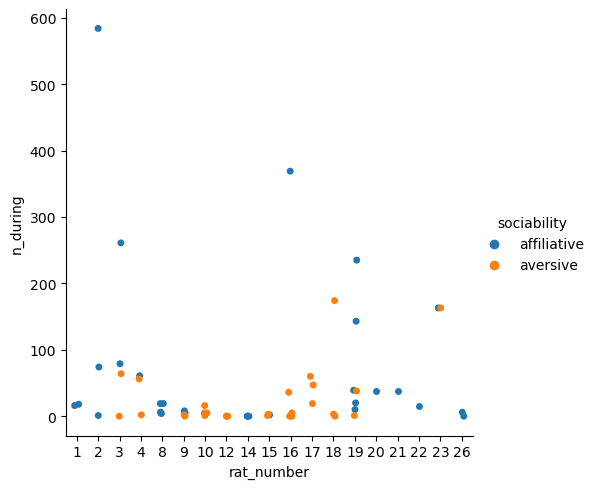

In [30]:
sns.catplot(data=summary_df_filled, hue='sociability', x='rat_number', y='n_during')

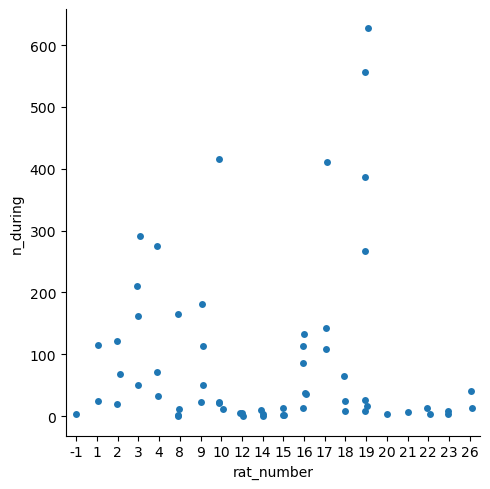

In [31]:
sns.catplot(data=summary_df_free.fillna(0),  x='rat_number', y='n_during')

In [339]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming your DataFrame is named 'df'
# # Replace 'df' with the actual variable name of your DataFrame if different.

# # Filter rows for 'aff' and 'avv' separately
# aff_df = df[df['sociability'] == 'affiliative']
# avv_df = df[df['sociability'] == 'aversive']

# # Define a function to calculate the number of events for each group (before, during, after)
# def count_events_by_flag(dataframe, flag_column):
#     return dataframe[flag_column].sum()

# # Calculate the number of events for 'aff' group
# aff_events_before = count_events_by_flag(aff_df, 'before_flag')
# aff_events_during = count_events_by_flag(aff_df, 'during_flag')
# aff_events_after = count_events_by_flag(aff_df, 'after_flag')

# # Calculate the number of events for 'avv' group
# avv_events_before = count_events_by_flag(avv_df, 'before_flag')
# avv_events_during = count_events_by_flag(avv_df, 'during_flag')
# avv_events_after = count_events_by_flag(avv_df, 'after_flag')

# # Combine the data into a single DataFrame for easier plotting
# data = pd.DataFrame({
#     'Category': ['Before', 'During', 'After'],
#     'Count': [aff_events_before/len(aff_df), aff_events_during/len(aff_df), aff_events_after/len(aff_df)],
#     'Group': 'aff'
# }).append(pd.DataFrame({
#     'Category': ['Before', 'During', 'After'],
#     'Count': [avv_events_before/len(avv_df), avv_events_during/len(avv_df), avv_events_after/len(avv_df)],
#     'Group': 'avv'
# }))

# # Create the bar plot using Seaborn
# sns.set_style("whitegrid")
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Category', y='Count', hue='Group', data=data, palette='pastel')
# plt.title("Number of Events Before, During, and After for 'affiliative' and 'aversive' Groups")
# plt.xlabel("Time Period")
# plt.ylabel("Number of Events")
# plt.show()


In [340]:
# import pandas as pd

# # Assuming your DataFrame is named 'df'
# # Replace 'df' with the actual variable name of your DataFrame if different.

# # Group the data by 'File_Name', 'rat_number', and 'day_number'
# grouped_data = df.groupby(['File_Name', 'rat_number', 'day_number','sociability','probe_number'])

# # Define a function to calculate the number of True occurrences for each flag
# def count_flags(flag_series):
#     return flag_series.sum()

# # Define a function to calculate the mean frequency for each flag
# def mean_frequency(freq_series, flag_series):
#     return freq_series[flag_series].mean()

# # Define a function to calculate the mean duration for each flag
# def mean_duration(begin_time_series, end_time_series, flag_series):
#     return (end_time_series[flag_series] - begin_time_series[flag_series]).mean()

# # Create the summary DataFrame
# summary_df = pd.DataFrame({
#     'n_before': grouped_data['before_flag'].apply(count_flags),
#     'n_during': grouped_data['during_flag'].apply(count_flags),
#     'n_after': grouped_data['after_flag'].apply(count_flags),
#     'mean_frequency_before': grouped_data.apply(lambda x: mean_frequency(x['Mean_Freq'], x['before_flag'])),
#     'mean_frequency_during': grouped_data.apply(lambda x: mean_frequency(x['Mean_Freq'], x['during_flag'])),
#     'mean_frequency_after': grouped_data.apply(lambda x: mean_frequency(x['Mean_Freq'], x['after_flag'])),
#     'mean_duration_before': grouped_data.apply(lambda x: mean_duration(x['Begin_Time'], x['End_Time'], x['before_flag'])),
#     'mean_duration_during': grouped_data.apply(lambda x: mean_duration(x['Begin_Time'], x['End_Time'], x['during_flag'])),
#     'mean_duration_after': grouped_data.apply(lambda x: mean_duration(x['Begin_Time'], x['End_Time'], x['after_flag']))
# }).reset_index()

# # Display the summary DataFrame
# print(summary_df)


In [341]:
summary_df.to_excel('chamber_vocalizations_summary.xlsx')

In [32]:
summary_df_free.to_excel('free_vocalizations_summary.xlsx')